# UPPA Anglet - Project evaluation machine learning - House

For this project we chose to work on the House dataset (house.csv).

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It's a great dataset for evaluating simple regression models for predicting the price of a house depending on its characteristics.
<br/>
**Output variable :** price (continuous)

## Steps
1. Clean the dataset
2. Load the dataset
3. Use Machine learning to determine the output (price)


---



## Prequisites
### Importing python librairies
We are going to import the Python librairies we are going to use to build our machine learning models.


*   pandas
*   sklearn
*   matplotlib



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

#For our neural network, we are using keras from tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

### Loading the dataset
Then we are going to load our data into the code lab.

In [ ]:
# Load the dataset
file_path = './house.csv'
data = pd.read_csv(file_path)

### Ploting the raw data
The second step in the process for us is to visualize the raw data before working on it in order to spot outliers and potential problems with the dataset.

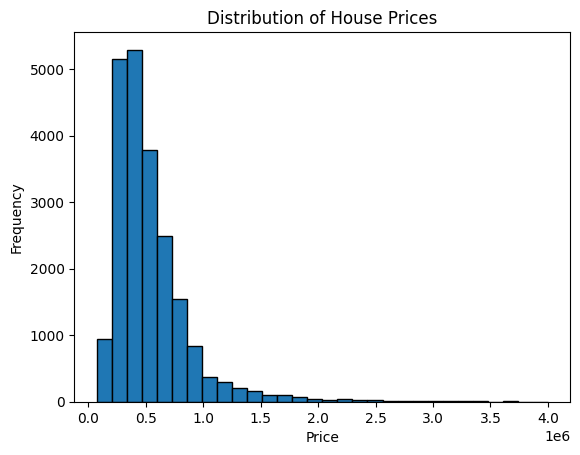

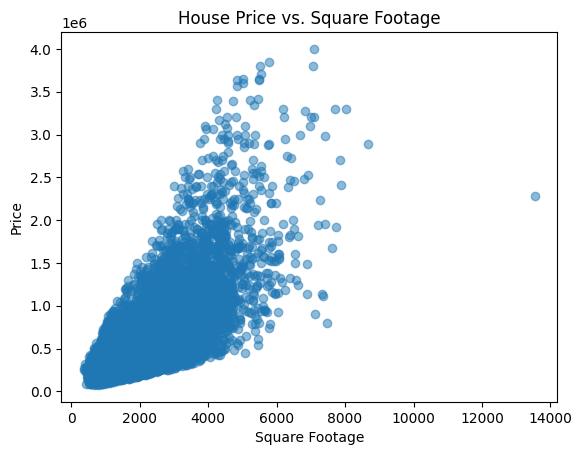

In [ ]:
# Data visualization
# This histogram shows the distribution of house prices
plt.hist(data['price'], bins=30, edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Scatter plot to visualize the relationship between sqft_living and price
plt.scatter(data['sqft_living'], data['price'], alpha=0.5)
plt.title('House Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

#### Analysis conclusion
For this first analysis of our raw dataset, we can spot multiple outliers that we could easely fix by cleaning our dataset using simple filters.
On the first graph, we can see the repartition is not good for our study and we could easely remove houses with a price > 4 million without causing too much trouble on our dataset for our future machine.
The second graph shows us some outliers on the price depending on the square foot of living. By fitlering houses with a price of 4 million as said above, we can clean this outliers out of our dataset.

### Cleaning the dataset
We will clean the dataset to remove outliers. We have studied that by removing all housing prices over 4 000 000 to clean our dataset.
We will plot our new dataset following the cleaned dataset.

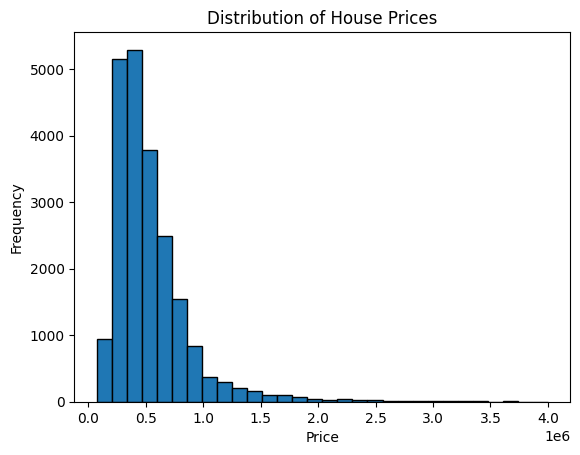

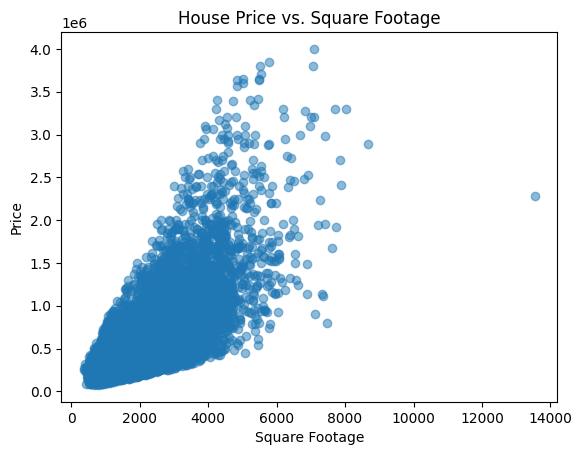

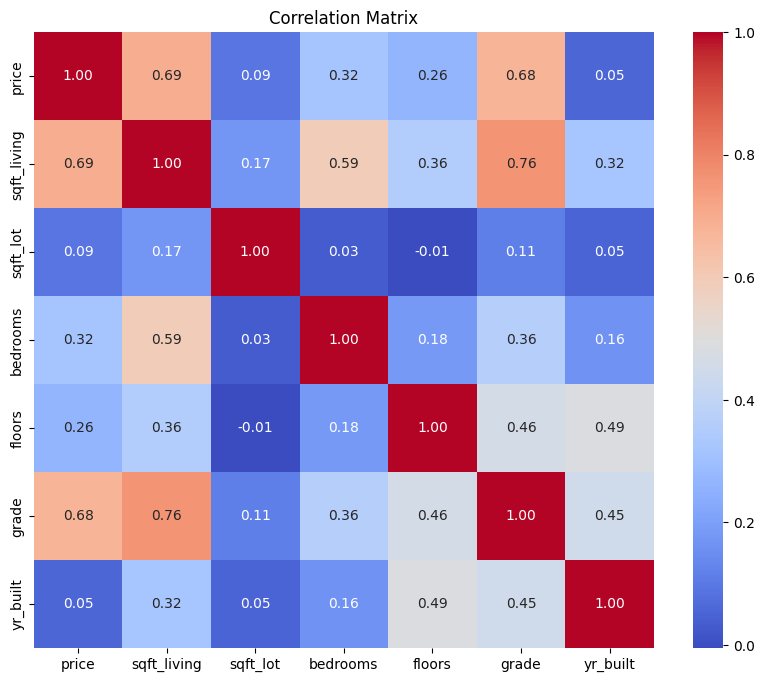

In [ ]:
# Filtering out houses with prices above $4 million
data = data[data['price'] <= 4e6]
data = data[data['bedrooms'] > 0]
data = data[data['bedrooms'] < 33]

# Data visualization
# This histogram shows the distribution of house prices
plt.hist(data['price'], bins=30, edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Scatter plot to visualize the relationship between sqft_living and price
plt.scatter(data['sqft_living'], data['price'], alpha=0.5)
plt.title('House Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

# Selecting the relevant columns
selected_columns = data[['price', 'sqft_living','sqft_lot','bedrooms','floors','grade','yr_built']]

# Calculating the correlation matrix
correlation_matrix = selected_columns.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Cleaning conclusion
By only removing houses with a price > 4 million, we already have cleaned a good portion of our dataset. Most of the outliers are now gone and the repartition (first graph) is much better than the original one.
We have graphed out a resolution matrix to see which variable of our dataset would impact our price. We found two varaibles we can identify as independent for our machine, the square foot living (**sqft_living**) and the grade for each house (**grade**).
We are going ot use both these varaibles to feed our machine.

## First model : Linear Regression
Linear regression is a fundamental statistical method in machine learning for predicting a quantitative variable. It establishes a linear relationship between a dependent variable (target) and one or more independent variables (predictors).

The core idea is to find a "best fit line" that minimizes the difference between predicted and actual values. It involves calculating coefficients that represent the slope and intercept of this line.

We use linear regression because it's simple, efficient, and interpretable. It's a straightforward technique for predictive analysis and serves as a foundational method for understanding relationships between variables. Due to its simplicity and interpretability, linear regression is often the first approach in modeling linear relationships in data.

### Step 1 : Splitting the dataset and implementing the Linear Regression model


#### Step 1.1 : Selecting our variables
We select our varaibles. For the dependent variable, we've chose the price (because it is the value we are trying to predict) and for our independent variable we've chose the square foot of living).

In [ ]:
# Selecting the independent and dependent variables
# sqft_living and grade are chosen as the independent variable and price as the dependent variable
X = data[['sqft_living','grade']]  # Independent variable
y = data['price']  # Dependent variable

#### Step 1.2

We split our variables sets into a training and testing set.

In [ ]:
# Splitting the dataset into training and testing sets
# We use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 1.3
We implement the Linear Regression

In [ ]:
# Creating the linear regression model
model = LinearRegression()

# Training the model using the training set
model.fit(X_train, y_train)

LinearRegression()

#### Step 1.4
We predict our dataset using the new linear regression.

In [ ]:
# Making predictions using the testing set
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 score: {r2}")

Mean Squared Error: 51612958929.280914
Mean Absolute Error: 160012.4272095894
R^2 score: 0.532255172461569


#### Prediction conclusion
We evaluate our models with three different indicators, the mean squared and absolute error and the R^2 result. Here we have :

> Mean Squared Error: 51612958929.280914 <br/>
> Mean Absolute Error: 160012.4272095894 <br/>
> R^2 score: 0.532255172461569 <br/>

The R^2 score is not bad, indicated a 53% percent of error and for MAE we've got an error marge of 160012.42, which is quite large and must be considered in our final conclusion. However, due to the price range, this is not a bad result (we could have had worse)



### Step 2 : Evaluation & result

We will calculate the Mean Squared Error and plot our prediction against the dataset to evaluate our model.

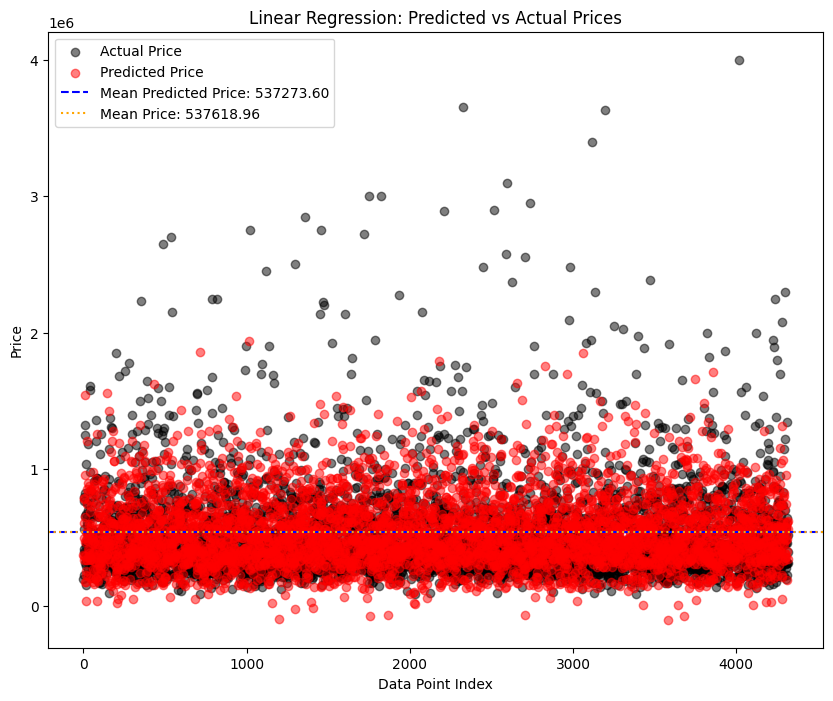

In [ ]:
mean_predicted_price = y_pred.mean()

# Create the scatter plot for actual and predicted prices
plt.figure(figsize=(10, 8))
plt.scatter(range(len(y_test)), y_test, color='black', alpha=0.5, label='Actual Price')

# Add a horizontal line for the mean predicted price
plt.axhline(mean_predicted_price, color='blue', linestyle='--', label=f'Mean Predicted Price: {mean_predicted_price:.2f}')

# Add title and labels
plt.title('Linear Regression: Predicted vs Actual Prices')
plt.xlabel('Data Point Index')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Evaluation conclusion
From the graph above, our model is well representing the actual price for each house depending on their grade and square foot of living. Our mean for the overall prediction is at 537273.60$.


### Step 3 : Conclusion

This first model got a R^2 high but not great with only 53%. The model fits our dataset with two correlated variables.
We are going to test using the Random Forest Algorithm
---



## Second model : Random Forest


### Step 1 : Splitting the dataset and implementing the Linear Regression model


#### Step 1.1 : Selecting our variables
We select our varaibles. For the dependent variable, we've chose the price (because it is the value we are trying to predict) and for our independent variable we've chose the square foot of living).

In [ ]:
# Selecting the independent and dependent variables
# sqft_living and grade are chosen as the independent variable and price as the dependent variable
X = data[['sqft_living','grade']]  # Independent variable
y = data['price']  # Dependent variable

### Step 1.2 : Splitting the data
We split our variables sets into a training and testing set.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 1.3 : Implementing the random forest algorithm

We implement the Random Forest algorithm and fit it to our dataset from the selected variable.

In [ ]:
# Scale the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions_rf = random_forest.predict(X_test_scaled)



### Step 1.4 : Evaluation

We will calculate the Mean Squared Error and plot our prediction against the dataset to evaluate our model.

In [ ]:
# Calculate the metrics
mse_rf = mean_squared_error(y_test, predictions_rf)
mae_rf = mean_absolute_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)

# Output the performance
print("Random Forest - MSE:", mse_rf)
print("Random Forest - MAE:", mae_rf)
print("Random Forest - R^2:", r2_rf)

Random Forest - MSE: 58156885271.105965
Random Forest - MAE: 161702.66125672654
Random Forest - R^2: 0.4729505373141223


#### Prediction conclusion
We evaluate our models with three different indicators, the mean squared and absolute error and the R^2 result. Here we have :

> Random Forest - MSE: 58156885271.105965 <br/>
> Random Forest - MAE: 161702.66125672654 <br/>
> Random Forest - R^2: 0.4729505373141223 <br/>

Our R^2 score for Random Forest is slightly lower than the one we've got for the linear regression. Same for the MAE with an error marge of 161702.66$ on average on the predicted price.



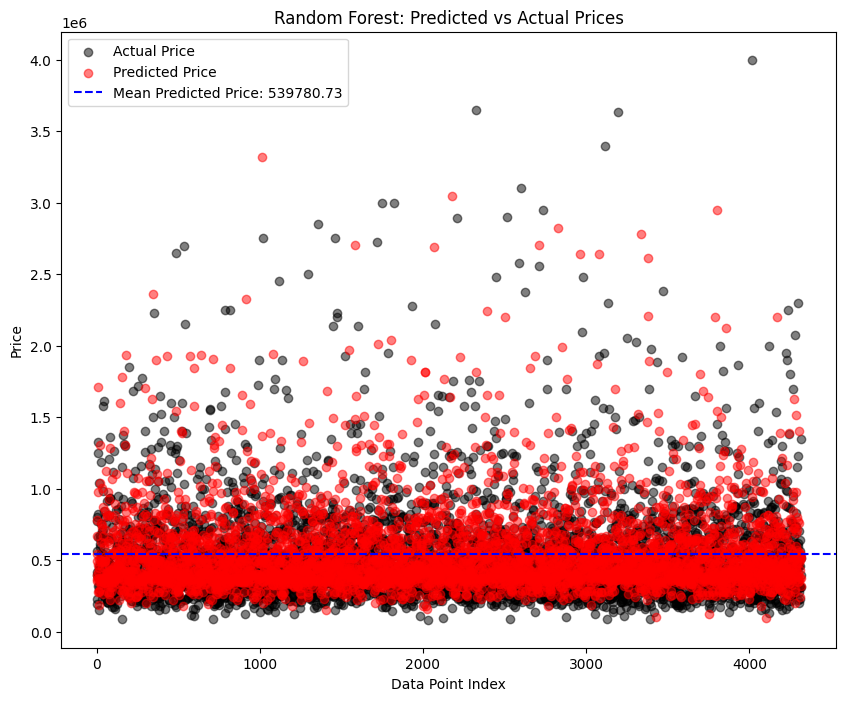

In [ ]:
mean_predicted_price = predictions_rf.mean()

# Create the scatter plot for actual and predicted prices
plt.figure(figsize=(10, 8))
plt.scatter(range(len(y_test)), y_test, color='black', alpha=0.5, label='Actual Price')
plt.scatter(range(len(predictions_rf)), predictions_rf, color='red', alpha=0.5, label='Predicted Price')

# Add a horizontal line for the mean predicted price
plt.axhline(mean_predicted_price, color='blue', linestyle='--', label=f'Mean Predicted Price: {mean_predicted_price:.2f}')

# Add title and labels
plt.title('Random Forest: Predicted vs Actual Prices')
plt.xlabel('Data Point Index')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Evaluation conclusion
We can see that our Random Forest, just like our Linear Regression tends to predict the price in a good way. Our predicted mean price is slightly lower at 161702.66$ which is close to the one we've got with the Linear Regression.
So it seems both model, using two independant variable, tends to moderatly correlate to the actual dataset and thus predict the data correctly.

---



## Price correlation - House position and price

We are going to plot the position of the houses on the map of Seattle and group housing depending on position and prices.
We are going to use a clustering algorithm to achieve this and try to prove their is a correlation between the location of houses and their price. We are logicaly waiting for the price to be higher at the heart of the city and less expensive outside in the countryside.

### Price and location using raw data
First, we want to display a heatmap of the housing price depending on the location. Wre are going to use open-stree-map to display this data

In [ ]:
# Create the heatmap using the density_mapbox function
# Using the "open-street-map" style which does not require an access token
fig = px.density_mapbox(data,
                        lat='lat',
                        lon='long',
                        z='price',  # Data to show in heatmap
                        radius=10,  # Adjust the radius as needed
                        center=dict(lat=data['lat'].mean(), lon=data['long'].mean()),  # Center the map
                        zoom=10,
                        mapbox_style="open-street-map")  # No access token required

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

As awaited, we do have a correlation between the location of the house and its price. The city heart is way more expensive than the country side.


---

### Clustering the data
We want to cluster our data in order to form different group of prices depending on the location. We are going to group our data into 3 different groups.


1.   Expensive
2.   Medium
2.   Cheap


We will display each group on a map.

In [ ]:
# Selecting the relevant columns (latitude, longitude, and price)
mdata = data[['lat', 'long', 'price']]

# Performing k-means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(mdata[['lat', 'long']])  # Only cluster based on location
data['cluster'] = clusters

# Create the scatter mapbox plot with clusters
fig = px.scatter_mapbox(data,
                        lat="lat",
                        lon="long",
                        color="cluster",
                        size="price",  # Size points by price
                        color_discrete_sequence=px.colors.qualitative.Set1,  # Use discrete color sequence
                        size_max=15,
                        zoom=10,
                        mapbox_style="carto-positron")

# Calculate and draw rectangles for cluster boundaries
for i in range(k):
    cluster_data = data[data['cluster'] == i]
    min_lat, max_lat = cluster_data['lat'].min(), cluster_data['lat'].max()
    min_long, max_long = cluster_data['long'].min(), cluster_data['long'].max()

    fig.add_trace(go.Scattermapbox(
        mode = "lines",
        lon = [min_long, max_long, max_long, min_long, min_long],
        lat = [min_lat, min_lat, max_lat, max_lat, min_lat],
        marker = dict(size=1),
        line = dict(width=2, color='black'),
        showlegend=False,
    ))

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



#### Clustering conclusion

As we were hoping to see, there is a correlation between the different part of the city and the actual price of each house. And, we have been able to conclusively use a clustering algorithm (near K-mean clustering) to graph out the three different part of the city which cost less or the most. Of course, this clustering could be divised in much more groups to output a more granural result over all the city and its region (plotting which stree of the city is considered wealthy or poor.


---


# Neural network to the data

Epoch 1/100
432/432 [==============================] - 2s 3ms/step - loss: 399420850176.0000 - mae: 532708.2500 - val_loss: 438484697088.0000 - val_mae: 547117.1250
Epoch 2/100
432/432 [==============================] - 1s 3ms/step - loss: 391420674048.0000 - mae: 526635.8750 - val_loss: 421603409920.0000 - val_mae: 534960.6250
Epoch 3/100
432/432 [==============================] - 1s 2ms/step - loss: 364744769536.0000 - mae: 506215.2500 - val_loss: 381017128960.0000 - val_mae: 504827.4062
Epoch 4/100
432/432 [==============================] - 1s 2ms/step - loss: 316463218688.0000 - mae: 466809.9375 - val_loss: 319197708288.0000 - val_mae: 454899.0312
Epoch 5/100
432/432 [==============================] - 1s 2ms/step - loss: 252979838976.0000 - mae: 408756.0938 - val_loss: 247110172672.0000 - val_mae: 388127.3750
Epoch 6/100
432/432 [==============================] - 1s 2ms/step - loss: 186726170624.0000 - mae: 337838.4688 - val_loss: 178287755264.0000 - val_mae: 312649.2500
Epoch 7/10

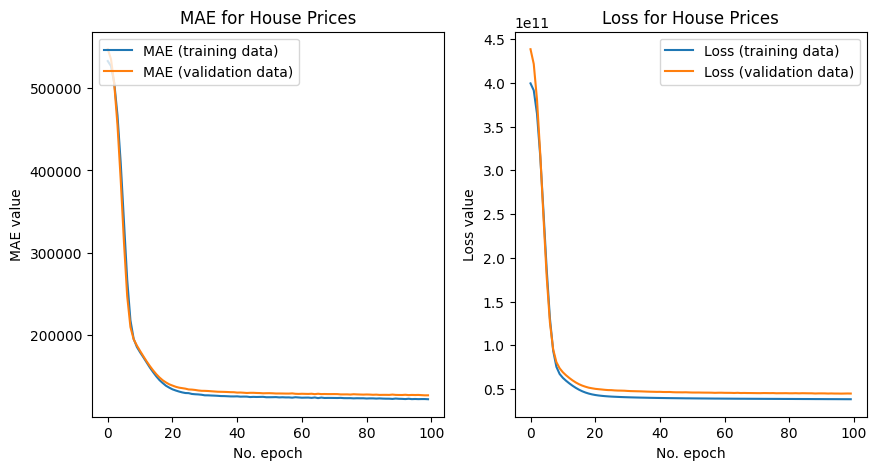

In [ ]:
# Selecting the specific features and target
features = data[['sqft_living', 'lat', 'long','grade','bedrooms']]  # Features
target = data['price']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer: 1 neuron for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)

# Predictions
predictions = model.predict(X_test_scaled)

# Output the performance
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='MAE (training data)')
plt.plot(history.history['val_mae'], label='MAE (validation data)')
plt.title('MAE for House Prices')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for House Prices')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

## Conclusion
For this Neural Network algorithm, from the graph above, we can see that it quickly learns from the dataset and the feeding data to linearize at around 20 epoch for both the MAE and loss. However, we must consider that both values seems to be high with a MAE of 123552.4844 and a loss of 39687159808.0 at epoch 100.
This two results are pretty high, precisely the loss. More data and training could be interesting and maybe using a better algorithm for the neural netork could help for this problem.